In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import cv2

Using TensorFlow backend.


In [2]:
def load_photos(directory):
    images = []
    labels = []
    for name in listdir(directory):
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(128, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value = int(name.split('_')[0])
        labels.append(value)
        images.append(image)
    return images, labels

In [3]:
#dataset = 'Dataset_cleaned'
#dataset = 'RichDataset'
#dataset = 'BigDataset'
#dataset = 'AugmentedDataset'
dataset = "Datasets_Axionable/ironcar_pics"

In [4]:
# load images from both train and test groups
directory = '../../../Patate_data/data/'+dataset+'/Train'
images, labels = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)
directory = '../../../Patate_data/data/'+dataset+'/Val'
images_val, labels_val = load_photos(directory)
nb_images_val = len(images_val)
print('Loaded Images and labels for validation: %d' % nb_images_val)

In [9]:
images = np.array(images)
images = images[:, 40:, :, :]
images /= 255
images_val = np.array(images_val)
images_val = images_val[:, 40:, :, :]
images_val /= 255

((16028, 88, 160, 3),
 array([[[ 0.5672307 ,  0.54762248,  0.62605498],
         [ 0.62361857,  0.60401035,  0.68244285],
         [ 0.5877905 ,  0.56904692,  0.6471912 ],
         ..., 
         [ 0.14972667,  0.14430441,  0.16401217],
         [ 0.25053672,  0.24654092,  0.26630415],
         [ 0.27112631,  0.27310373,  0.28989555]],
 
        [[ 0.5439923 ,  0.52448806,  0.60260861],
         [ 0.52968913,  0.5101849 ,  0.58830545],
         [ 0.54073848,  0.52209888,  0.59993122],
         ..., 
         [ 0.13456631,  0.13541533,  0.16745527],
         [ 0.23740135,  0.23949761,  0.27102186],
         [ 0.22733714,  0.24014754,  0.26818979]],
 
        [[ 0.52286591,  0.5073283 ,  0.57354898],
         [ 0.47199492,  0.45645731,  0.52267799],
         [ 0.55270529,  0.53803231,  0.60396478],
         ..., 
         [ 0.10306826,  0.11982601,  0.16822295],
         [ 0.15796582,  0.17576772,  0.22445663],
         [ 0.21387076,  0.23868585,  0.2873408 ]],
 
        ..., 
        [[

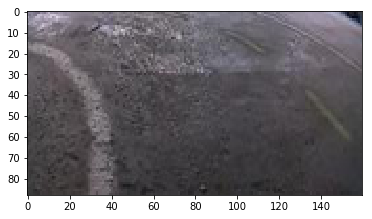

In [14]:
images.shape, plt.imshow(images[40]), images[40], labels[40]


In [12]:
#convert labels to np.array
labels = np.array(labels)
labels_val = np.array(labels_val)

NameError: name 'labels_val' is not defined

In [13]:
#convert datas to dummyvalues
labelsd = pd.get_dummies(labels)

Exception: Data must be 1-dimensional

In [16]:
labelsd

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ..., 
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=int64)

In [10]:
#convert to np.array again
labelsd = np.array(labelsd)

In [11]:
#check if OK
labels[1], labelsd[1]

(1, array([1, 0, 0], dtype=uint8))

In [17]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [18]:
#from keras.models import load_model
#model = load_model('model-BigDataset.h5')

In [19]:
K.clear_session()

img_in = Input(shape=(88, 160, 3), name='img_in')

x = img_in

x = Convolution2D(2, (16,16), strides=(8,8), activation='relu', padding='same')(x)
x = Dropout(.1)(x)
x = Convolution2D(4, (16,16), strides=(8,8), activation='relu', padding='same')(x)
x = Dropout(.1)(x)
x = Convolution2D(16, (16,16), strides=(8,8), activation='relu', padding='same')(x)
x = Dropout(.1)(x)

flat = Flatten()(x)

x = Dense(10)(flat)
x = Activation('relu')(x)
x = Dropout(.1)(x)
#categorical output
out = Dense(5, activation='softmax')(x)

model = Model(inputs=[img_in], outputs=[out])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 88, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 39, 8)         1544      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 9, 16)          2064      
_________________________________________________________________
flattened (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 3605      
Total params: 7,213
Trainable params: 7,213
Non-trainable params: 0
_________________________________________________________________


In [21]:
h = model.fit(images, labelsd, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
16028/16028 [==============================] - 36s - loss: 0.9184 - acc: 0.6421    
Epoch 2/20
16028/16028 [==============================] - 23s - loss: 0.4224 - acc: 0.8507    
Epoch 3/20
16028/16028 [==============================] - 23s - loss: 0.3070 - acc: 0.8988    
Epoch 4/20
16028/16028 [==============================] - 22s - loss: 0.2525 - acc: 0.9178    
Epoch 5/20
16028/16028 [==============================] - 23s - loss: 0.2168 - acc: 0.9307    
Epoch 6/20
16028/16028 [==============================] - 24s - loss: 0.1895 - acc: 0.9391    
Epoch 7/20
16028/16028 [==============================] - 27s - loss: 0.1663 - acc: 0.9470    
Epoch 8/20
16028/16028 [==============================] - 25s - loss: 0.1495 - acc: 0.9517    
Epoch 9/20
16028/16028 [==============================] - 23s - loss: 0.1325 - acc: 0.9584    
Epoch 10/20
16028/16028 [==============================] - 22s - loss: 0.1208 - acc: 0.9624    
Epoch 11/20
16028/16028 [========================

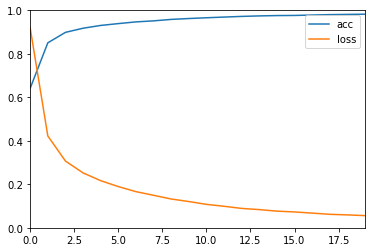

In [22]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [23]:
# Get predictions
all_preds = model.predict(images_val)

# Check predictions
idx = np.argmax(all_preds, axis=1)

i = 0
for value in idx:
    idx[i] = value + 1
    i = i + 1

idx, labels_val

NameError: name 'images_val' is not defined

In [30]:
import math
i = 0
res = 0
for value in idx:
    if value != labels_val[i]:
        res = res + 1
    i = i + 1
res/i

0.27289719626168224

In [56]:
model.save('model-'+dataset+'.h5')